# Analisis Exploratorio de datos

In [3]:
import numpy as np
np.random.seed(1001)

import os
import shutil

import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cross_validation import StratifiedKFold

%matplotlib inline
matplotlib.style.use('ggplot')

C:\Users\sbotalla.DTVPAN\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
train = pd.read_csv("C:/Users/sbotalla.DTVPAN/Desktop/train.csv")
test = pd.read_csv("C:/Users/sbotalla.DTVPAN/Desktop/sample_submission.csv")
ubicacion = 'C:/Users/sbotalla.DTVPAN/Desktop/'

In [51]:
train.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


In [15]:
print("Cantidad de ejemplos para Entrenamiento =", train.shape[0], "  Cantidad de Clases Unicas (Labels) =", len(train.label.unique()))

Cantidad de ejemplos para Entrenamiento = 9473   Cantidad de Clases Unicas (Labels) = 41


In [20]:
print(train.label.unique())

['Hi-hat' 'Saxophone' 'Trumpet' 'Glockenspiel' 'Cello' 'Knock'
 'Gunshot_or_gunfire' 'Clarinet' 'Computer_keyboard' 'Keys_jangling'
 'Snare_drum' 'Writing' 'Laughter' 'Tearing' 'Fart' 'Oboe' 'Flute' 'Cough'
 'Telephone' 'Bark' 'Chime' 'Bass_drum' 'Bus' 'Squeak' 'Scissors'
 'Harmonica' 'Gong' 'Microwave_oven' 'Burping_or_eructation' 'Double_bass'
 'Shatter' 'Fireworks' 'Tambourine' 'Cowbell' 'Electric_piano' 'Meow'
 'Drawer_open_or_close' 'Applause' 'Acoustic_guitar' 'Violin_or_fiddle'
 'Finger_snapping']


## Distribución de los Labels


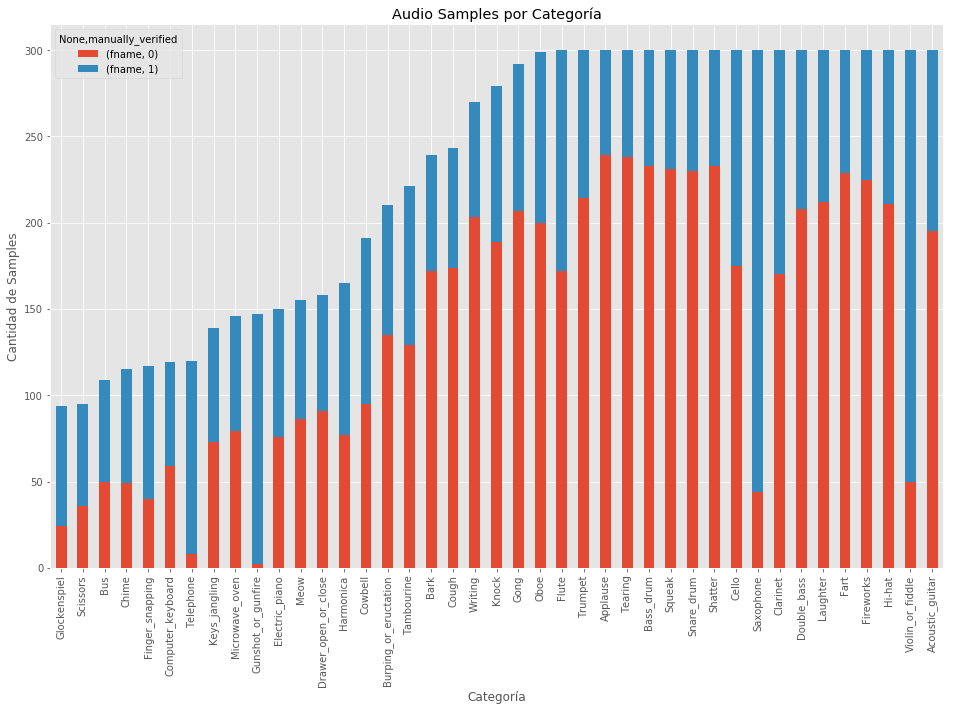

In [52]:
category_group = train.groupby(['label', 'manually_verified']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Audio Samples por Categoría", figsize=(16,10))
plot.set_xlabel("Categoría")
plot.set_ylabel("Cantidad de Samples");

In [40]:
print('Minimum samples per category = ', min(train.label.value_counts()))
print('Maximum samples per category = ', max(train.label.value_counts()))

Minimum samples per category =  94
Maximum samples per category =  300


###### 1) La cantidad  de samples no es uniforme (94 muestras es la mínima contra 300 para la máxima)
###### 2) La proporción de labels verificados tampoco es uniforme

In [53]:
fname = ubicacion + '00044347.wav'   # Hi-hat

# Using wave library

import wave
wav = wave.open(fname)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  44100
Total samples (frames) =  617400
Duration =  14.0


In [44]:
# Using scipy

from scipy.io import wavfile
rate, data = wavfile.read(fname)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  44100
Total samples (frames) =  (617400,)
[ 0 26 -5 ...,  1  0  0]


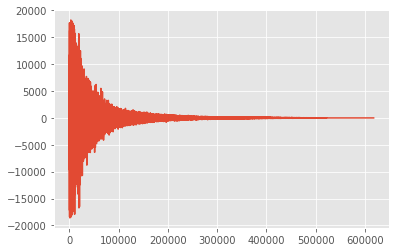

In [45]:
plt.plot(data, '-', );

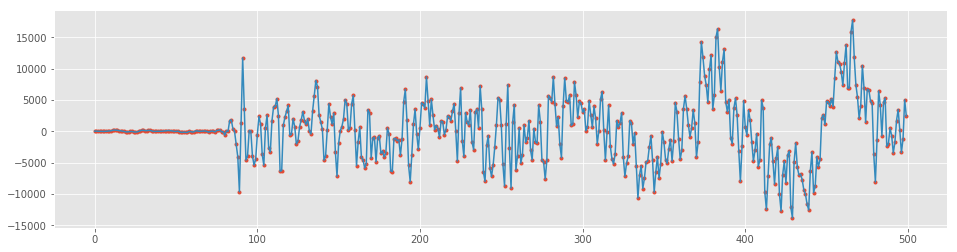

In [47]:
# Plot de los primeros 500 frames
plt.figure(figsize=(16, 4))
plt.plot(data[:500], '.'); plt.plot(data[:500], '-');

ValueError: Could not interpret input 'nframes'

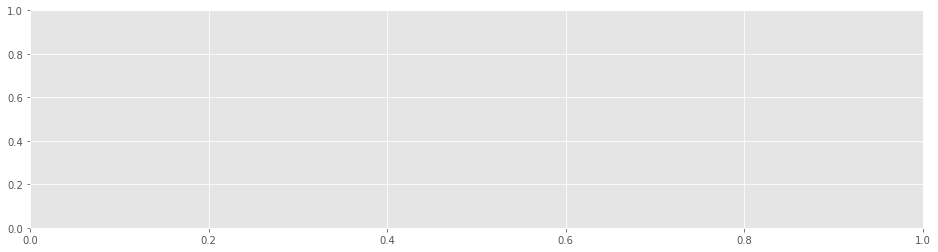

In [57]:
#train['nframes'] = train['fname'].apply(lambda f: wave.open(ubicacion + f).getnframes())
#test['nframes'] = test['fname'].apply(lambda f: wave.open(ubicacion + f).getnframes())

_, ax = plt.subplots(figsize=(16, 4))
sns.violinplot(ax=ax, x="label", y="nframes", data=train)
plt.xticks(rotation=90)
plt.title('Distribution of audio frames, per label', fontsize=16)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'nframes'

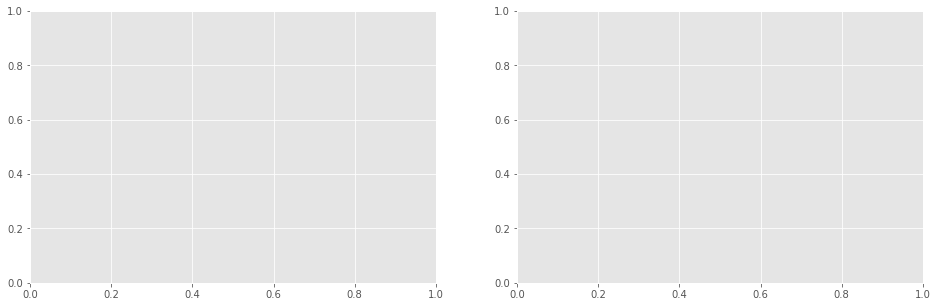

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
train.nframes.hist(bins=100, ax=axes[0])
test.nframes.hist(bins=100, ax=axes[1])
plt.suptitle('Frame Length Distribution in Train and Test', ha='center', fontsize='large');